# Ford GoBike System Data
## by Fawaz ALTuwaijri

## Preliminary Wrangling

This document explores a dataset containing durations and destinations for approximately 177,000 bike trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('202003-baywheels-tripdata.csv')

In [3]:
# Printing some information of the dataset
print('Shape = ', df.shape)
print(df.info())
df.sample(5)

Shape =  (176799, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-n

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
74018,98,2020-03-04 12:39:52,2020-03-04 12:41:31,NaN,NaN,37.336514,-121.882296,NaN,NaN,37.337243,-121.882635,944413,Subscriber,app
105573,922,2020-03-04 16:07:47,2020-03-04 16:23:10,100.0,Bryant St at 15th St,37.767100,-122.410662,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,438705,Subscriber,app
83584,1638,2020-03-08 11:28:02,2020-03-08 11:55:21,144.0,Precita Park,37.747300,-122.411403,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,949656,Subscriber,app
62317,678,2020-03-01 09:27:11.3590,2020-03-01 09:38:30.1890,461.0,Terry Francois Blvd at Mission Bay Blvd N,37.771330,-122.386622,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2934,Customer,NaN
128335,1324,2020-03-03 07:33:40,2020-03-03 07:55:44,NaN,NaN,37.776635,-122.438178,NaN,NaN,37.770027,-122.386487,790878,Subscriber,app


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,176799.000000,110696.000000,176799.000000,176799.000000,111097.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,185.082261,37.732506,-122.339595,179.244228,37.731290,-122.335029,332033.876114
std,1528.143090,154.647521,0.170476,0.336403,153.858017,0.278159,0.788013,310588.686471
min,60.000000,3.000000,0.000000,-122.513814,3.000000,0.000000,-122.529747,17.000000
25%,374.000000,58.000000,37.763708,-122.421339,53.000000,37.763848,-122.420377,11695.000000
50%,602.000000,125.000000,37.776598,-122.403969,121.000000,37.776598,-122.403234,299042.000000
75%,963.000000,321.000000,37.789677,-122.390648,309.000000,37.789747,-122.390648,551560.000000
max,84450.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


### What is the structure of your dataset?

There are 176,799 trips in the dataset with 14 fetures:
* duration_sec
* start_time
* end_time
* start_station_id
* start_station_name
* start_station_latitude
* start_station_longitude
* end_station_id
* end_station_name
* end_station_latitude
* end_station_longitude
* bike_id
* user_type (“Subscriber” = Member or “Customer” = Casual)
* rental_access_method

### What is/are the main feature(s) of interest in your dataset?

I'm most intrested in figuring out what features are best for predicting the duration of the trips in the database.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that user type have strongest effect on each trip duration: if the user is a member, he will have longer trips. I also think that start station's (I'll be using start_station_id to address that) will have effects on the trip duration, also I am curios if the rental access method will affect the rental duration or not. 

## Univariate Exploration

### Start with a standard-scaled plot for the main variable of interest: Duration.

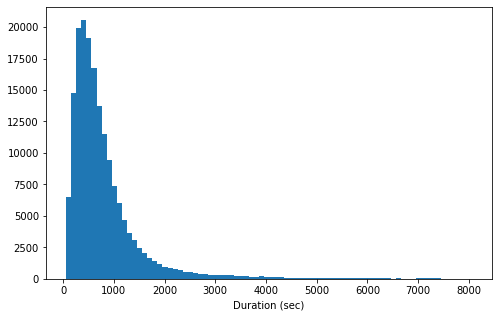

In [5]:
bins = np.arange(60, 8000+100, 100)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel("Duration (sec)");

> We see that there is a long tail in the distribution, let's put it on log scale instead

In [6]:
np.log10(df.duration_sec.describe())

count    5.247480
mean     2.935301
std      3.184164
min      1.778151
25%      2.572872
50%      2.779596
75%      2.983626
max      4.926600
Name: duration_sec, dtype: float64

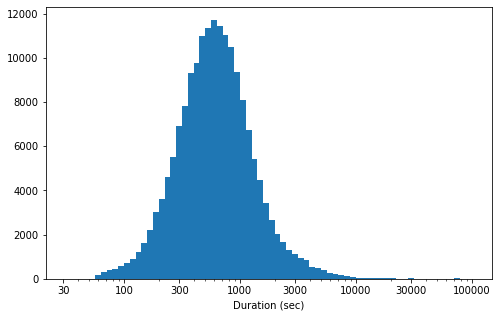

In [7]:
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)
plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel("Duration (sec)");

plt.xscale('log')
ticks = [30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

#### We see a unimodal graph, where the peak is around 700.

### Next, user types.

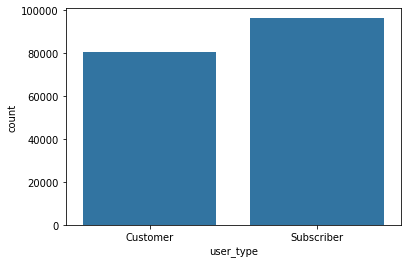

In [8]:
color = sb.color_palette()[0]

sb.countplot(data=df, x='user_type', color=color);

#### We can see that most of the rentals were from subscribers.

### Next lets see what access method were mostly used.

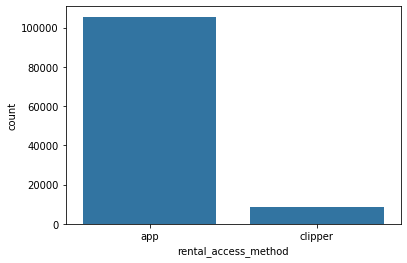

In [9]:
sb.countplot(data=df, x='rental_access_method', color=color);

#### Wow, wee see that there are way more people renting from the app than from the clipper.

### Now let's see if stations hold interesting properties.

In [10]:
df.start_station_id.value_counts().head(10)

30.0     1910
58.0     1851
16.0     1446
81.0     1414
3.0      1306
22.0     1158
21.0     1116
5.0      1100
15.0      951
114.0     909
Name: start_station_id, dtype: int64

In [11]:
top10_start_stations = ['30', '58', '16', '81', '3', '22', '21', '5', '15', '114']

> Since there are a lot of stations, I'll take top 10 stations.

In [12]:
df_2 = df[df['start_station_id'].isin(top10_start_stations)]

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13161 entries, 33 to 165786
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             13161 non-null  int64  
 1   start_time               13161 non-null  object 
 2   end_time                 13161 non-null  object 
 3   start_station_id         13161 non-null  float64
 4   start_station_name       13161 non-null  object 
 5   start_station_latitude   13161 non-null  float64
 6   start_station_longitude  13161 non-null  float64
 7   end_station_id           10694 non-null  float64
 8   end_station_name         10739 non-null  object 
 9   end_station_latitude     13161 non-null  float64
 10  end_station_longitude    13161 non-null  float64
 11  bike_id                  13161 non-null  int64  
 12  user_type                13161 non-null  object 
 13  rental_access_method     6738 non-null   object 
dtypes: float64(6), int64

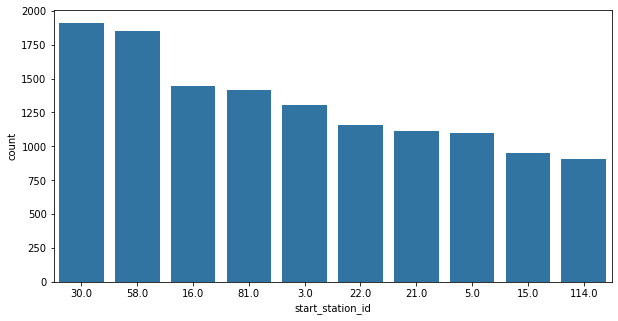

In [14]:
plt.figure(figsize=[10,5])

sb.countplot(data=df_2, x='start_station_id', color=color, order=df_2['start_station_id'].value_counts().index);

#### We see that station id 30 and 58 together has around 3760 trips, then the other stations with slightly differens between each other.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable had a long-tailed distribution, so I looked at the data using a log transform. The data had one peak between 600 and 1000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the user types I found that the subscribers have almost 2000 more trips than normal customers. Also when I invedtigated access method I found that around 90% of rentals were from the app. For the stations, I had to reduce the number of stations so I can graph them, so I choose top 10 start stations.

## Bivariate Exploration

### To start, I'll see how does user type affect the duration.

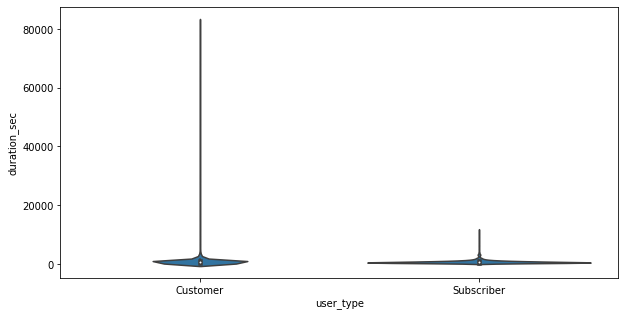

In [15]:
plt.figure(figsize=[10,5])

sb.violinplot(data=df_2, x='user_type', y='duration_sec', color=color);

We see a lot of data above average in the customer data, so I think it'll be better if I removed them so we can see the graph clearly. 

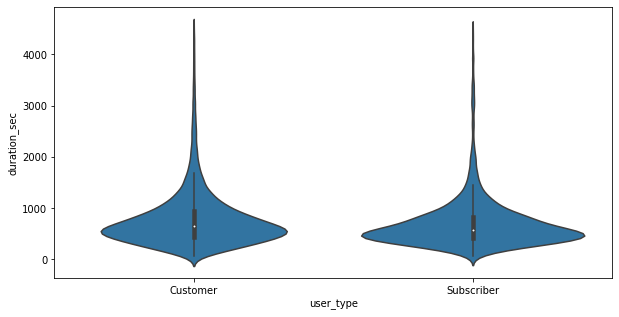

In [16]:
plt.figure(figsize=[10,5])

sb.violinplot(data=df_2.query('duration_sec < 4500'), x='user_type', y='duration_sec', color=color);

#### hmmm, it seems that subscribers tend to have slightly less durations than customers.

### Now let's see if access method affects the duration.

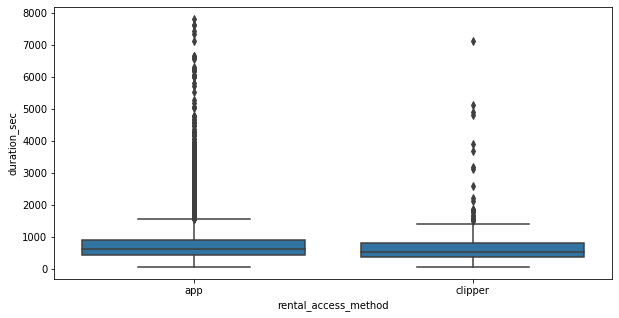

In [23]:
plt.figure(figsize=[10,5])

sb.boxplot(data=df_2.query('duration_sec < 8000'), x='rental_access_method', y='duration_sec', color=color);

#### We see that rentals from the app have higher average then clipper 

### Lastly let's see the relation between the starting station with duration.

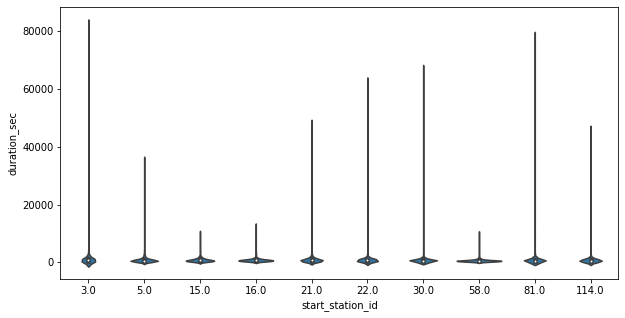

In [18]:
plt.figure(figsize=[10,5])

sb.violinplot(data=df_2, x='start_station_id', y='duration_sec', color=color);

reducing the duration range to see the details. 

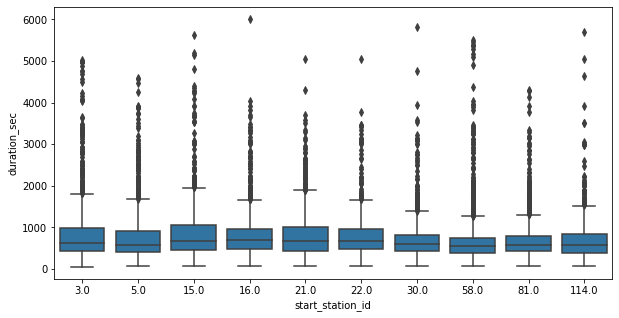

In [19]:
plt.figure(figsize=[10,5])

sb.boxplot(data=df_2.query('duration_sec < 6000'), x='start_station_id', y='duration_sec', color=color);

#### We see that station ID 15,16,21, and 22 have slightly higher average then other stations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Starting from the user type vs duration, we found that normal customers tend to have slightly more duration then subscribed customer. Next we saw how rental access method will afffect the duration, and we found that rentals from the app tend to have longer duration than clippers. After that we investigated if the start station will affect the duration, and we found that stations with the ID 15,16,21, and 22 have higher averages than other stations.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The dataset is a bit small so I Used almost all of it in the main feature(s) of interest.

## Multivariate Exploration

The main things I want to Investigate is the relation between duration and start station and user type.

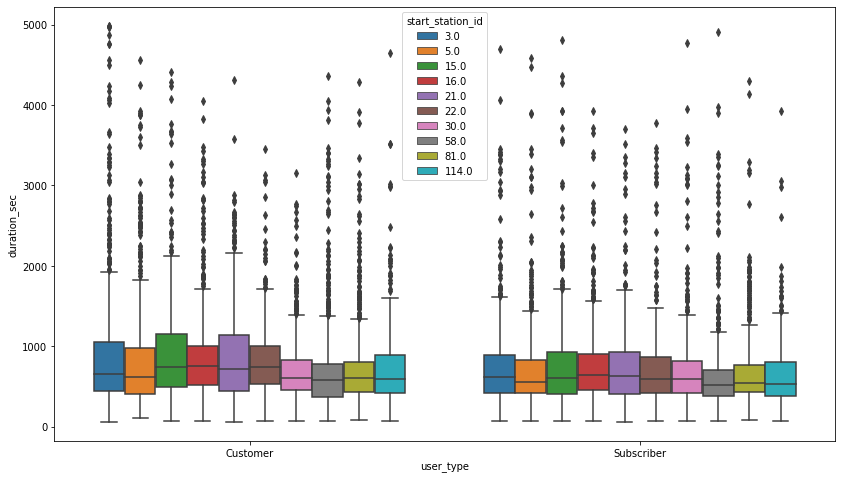

In [20]:
plt.figure(figsize=[14,8])

sb.boxplot(data=df_2.query('duration_sec < 5000'), x='user_type', y='duration_sec', hue='start_station_id');

#### We see that only station ID 30 has a higher average for subscribers than customer.

### now let's change the stations to access method.

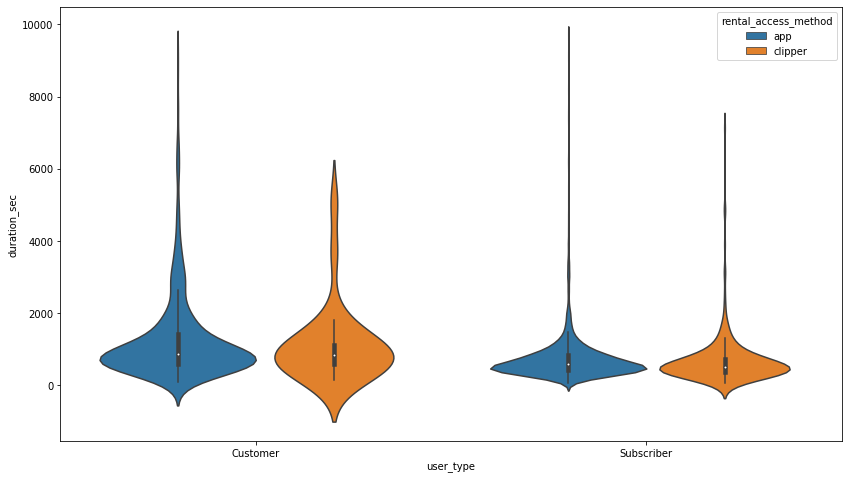

In [21]:
plt.figure(figsize=[14,8])

sb.violinplot(data=df_2.query('duration_sec < 10000'), x='user_type', y='duration_sec', hue='rental_access_method');

#### Interesting, we see that there is almost no difference between the app or clipper in the subscriber category, but in the customer we see that most of the app users rent for a duration of around 1000s, but for the clipper we see more variation.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When I investigated the relation between duration, user type, and start station, I found that there is only one station seems to have more average in the subscribers category than customer, which is station ID 30. After that I changed tha station to rental access method and I found that the in the subscriber category there is no big differance between the app rentals and the clipper, but in the customer category we see that for the clipper rentals, there is variation in the rentals duration.

### Were there any interesting or surprising interactions between features?

In the duration vs station vs user type graph, there is no clear relation between the station and the user type.